# Suppot Vector Machine

### Perbedaan SVM dengan Logistic Regression

**Secara Fungsi**
- Regresi Logistik: Regresi logistik menggunakan fungsi sigmoid (logistik) untuk menghasilkan probabilitas kelas dan mengukur sejauh mana data input cocok dengan berbagai kelas. Fungsi tujuannya adalah untuk meminimalkan deviasi antara probabilitas yang diprediksi dan nilai target.
- SVM: SVM bertujuan untuk menemukan hiperplane yang memaksimalkan margin antara kelas. SVM mencoba memaksimalkan batas keputusan antara kelas, dan tujuannya adalah untuk mencari hiperplane yang membagi data secara optimal.

**Kelompok Solusi:**

- Regresi Logistik: Regresi logistik menghasilkan solusi dalam bentuk probabilitas kelas yang kontinu antara 0 dan 1. Anda kemudian memilih threshold tertentu untuk mengklasifikasikan data ke kelas tertentu.
- SVM: SVM menghasilkan solusi dalam bentuk pemisah linier atau non-linier (bergantung pada kernel yang digunakan) yang memisahkan kelas. Ini menghasilkan keputusan kelas berdasarkan posisi data terhadap hiperplane.

**Loss Function:**

- Regresi Logistik: Menggunakan fungsi loss seperti Cross-Entropy Loss (Log Loss) untuk mengukur kesalahan dalam probabilitas yang diprediksi.
- SVM: Menggunakan fungsi loss yang berfokus pada margin maksimum (misalnya, Hinge Loss) untuk mengukur kesalahan dalam pemisahan kelas.

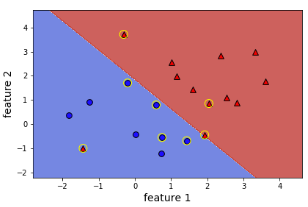
- SVM didefinisikan sebagai contoh yang tidak berada di bagian datar dari loss diagram
- pada gambar diatas SVM ditunjukan dengan lingkaran kuning, mereka salah memasukan contoh yang diklasifikasikan dengan benar dekat batas
- jika bukan SVM maka tidak akan berpengaruh dengan model

### Max Margin Viewpoint

Max Margin Viewpoint adalah prinsip utama dalam algoritma Mesin Vector Pendukung (Support Vector Machine atau SVM). Ini mengacu pada pendekatan dasar dalam SVM yang menekankan pentingnya mencari hiperplane yang memiliki margin maksimum dalam memisahkan kelas-kelas dalam masalah klasifikasi.

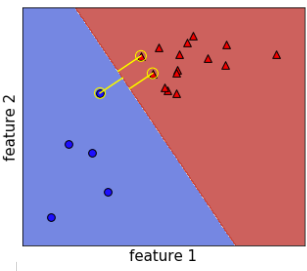

- Margin: Dalam konteks SVM, margin mengacu pada jarak antara garis batas keputusan (hiperplane) dan titik data terdekat dari masing-masing kelas. Margin ini menggambarkan sejauh mana terjadi pemisahan antar kelas, dan semakin besar margin, semakin baik pemisahan tersebut.

- Vektor Pendukung: Vektor pendukung adalah titik-titik data yang terletak paling dekat dengan garis batas keputusan. Mereka sangat penting dalam menentukan margin karena mereka memengaruhi posisi dan orientasi garis batas keputusan.

- Margin Maksimum: Pandangan margin maksimum dalam SVM bertujuan untuk menemukan hiperplane yang memaksimalkan margin, sehingga pemisahan antar kelas seoptimal mungkin. Ini berarti SVM berusaha menempatkan garis batas keputusan sehingga sejauh mungkin dari titik data terdekat dari kedua kelas.

- Optimisasi: SVM merumuskan masalah optimisasi untuk menemukan hiperplane yang memaksimalkan margin. Ini melibatkan penyelesaian masalah optimisasi konveks untuk menentukan bobot dan bias (koefisien) hiperplane.

- Klasifikasi dengan Vektor Pendukung: Data yang terletak paling dekat dengan garis batas keputusan disebut vektor pendukung. Vektor pendukung memainkan peran penting dalam menentukan posisi dan lebar margin. Lebar margin didefinisikan sebagai jarak tegak lurus dari garis batas keputusan ke vektor pendukung.

Pandangan margin maksimum memiliki beberapa keuntungan:

- Ini menghasilkan solusi yang baik dan unik untuk memisahkan titik data.
- Cenderung menghasilkan generalisasi yang lebih baik dan kinerja yang lebih baik pada data yang tidak terlihat sebelumnya karena model dilatih untuk berfokus pada data-data paling kritis (vektor pendukung).
- Ini membantu model menangani outlier secara efektif karena mengurangi pengaruhnya pada garis batas keputusan.

Dalam ringkasan, pandangan margin maksimum dalam SVM menekankan pentingnya menemukan hiperplane yang memaksimalkan jarak antar kelas, menghasilkan model klasifikasi yang kuat dan akurat. Inilah sebabnya mengapa SVM sering digunakan dalam berbagai aplikasi pembelajaran mesin, terutama ketika pemisahan yang jelas antar kelas sangat penting.






### Exercise

**Support vector definition**

Which of the following is a true statement about support vectors? To help you out, here's the picture of support vectors from the video (top), as well as the hinge loss from Chapter 2 (bottom).

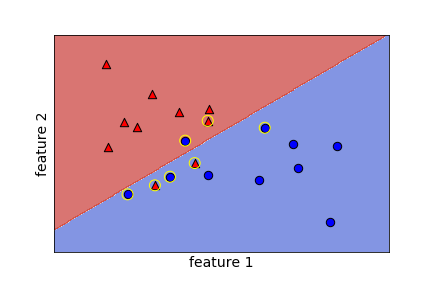

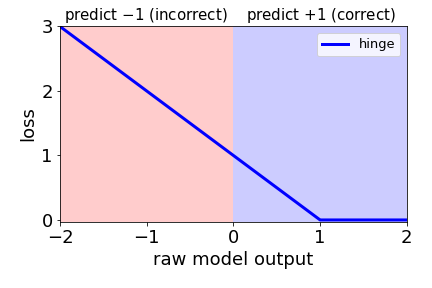

ans : All incorrectly classified points are support vectors.

**Effect of removing examples**

Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into X and y (first two features only). (Note: we specify lims in plot_classifier() so that the two plots are forced to use the same axis limits and can be compared directly.)

- Train a linear SVM on the whole data set.
- Create a new data set containing only the support vectors.
- Train a new linear SVM on the smaller data set.

In [3]:
import pandas as pd

In [4]:
X = pd.read_csv('./dataset/wine_X.csv').to_numpy()
y = pd.read_csv('./dataset/wine_y.csv').to_numpy().ravel()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

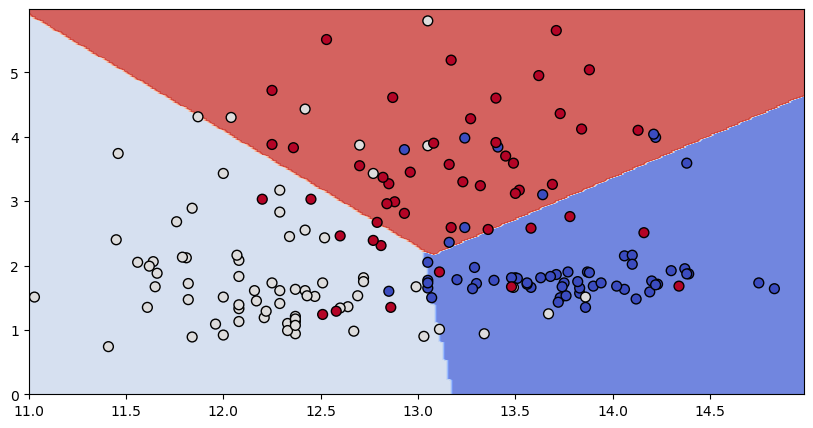

Number of original examples 178
Number of support vectors 81


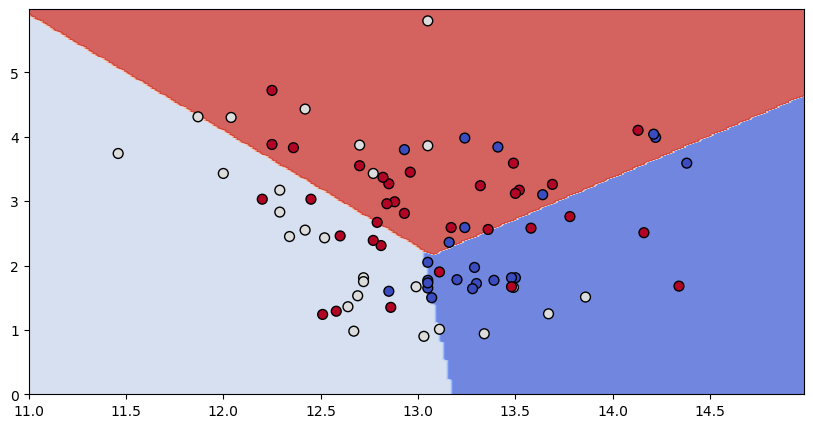

In [7]:
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11, 15, 0, 6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel='linear')
svm_small.fit(X, y)
plot_classifier(X_small, y_small, svm_small, lims=(11, 15, 0, 6))

> Nice! Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors, they should be!

## Kernel SVM

Kernel SVM (Support Vector Machine) adalah varian dari SVM yang memungkinkan pemisahan data yang tidak linier dengan mentransformasi data ke dalam dimensi yang lebih tinggi. Ini memungkinkan SVM untuk menangani masalah klasifikasi yang tidak dapat dipisahkan secara linier di ruang dimensi rendah. Kernel adalah fungsi matematis yang digunakan untuk melakukan transformasi ini. Mari kita jelaskan konsep kernel SVM:

- Masalah Pemisahan Non-Linier: Dalam beberapa kasus, data tidak dapat dipisahkan dengan hiperplane linier di ruang dimensi rendah. Dalam hal ini, solusi SVM linier mungkin tidak memadai.

- Transformasi Ruang Dimensi Tinggi: Kernel SVM menangani masalah ini dengan melakukan transformasi data ke dalam ruang dimensi yang lebih tinggi. Misalnya, jika Anda memiliki data dua dimensi yang tidak dapat dipisahkan secara linier, Anda dapat mentransformasikannya ke ruang tiga dimensi, di mana pemisahan menjadi lebih mudah.

- Kernel Functions: Kernel adalah fungsi matematis yang mengukur kesamaan antara dua titik data dalam ruang asli atau ruang dimensi yang lebih tinggi. Kernel mengambil pasangan titik data dan mengembalikan skalar yang mencerminkan sejauh mana titik-titik tersebut mirip.

- Contoh Kernel Functions:
    - Linear Kernel: K(x, y) = x * y. Ini merupakan kernel linier dan ekuivalen dengan SVM linier.
    - Polynomial Kernel: K(x, y) = (x * y + c)^d. Ini melakukan transformasi ke ruang dimensi tinggi dengan polinomial derajat d.
    - RBF (Radial Basis Function) Kernel: K(x, y) = exp(-γ||x - y||^2). Ini menghasilkan transformasi ke ruang dimensi tak terbatas dengan bentuk fungsi Gauss.

- Keuntungan Kernel SVM:
    - Mengatasi masalah pemisahan non-linier dengan cara yang efektif.
    - Dapat menggabungkan transformasi data ke dimensi yang lebih tinggi tanpa benar-benar menghitung transformasi tersebut, yang menghemat waktu komputasi.
    - Dalam beberapa kasus, kernel SVM dapat memberikan pemisahan yang lebih baik dan kinerja yang lebih baik dibandingkan dengan metode non-linier lainnya.

- Pemilihan Kernel: Pemilihan kernel adalah salah satu aspek kunci dalam penggunaan kernel SVM. Anda perlu memilih kernel yang sesuai dengan karakteristik data Anda. Ini melibatkan eksperimen dan penyetelan parameter kernel.

Kernel SVM adalah alat yang kuat untuk menangani masalah klasifikasi non-linier, dan dengan pemilihan kernel yang tepat, dapat menghasilkan model yang sangat akurat dan generalisasi yang baik pada data baru.

### Exercise

**GridSearchCV warm-up**

In the video we saw that increasing the RBF kernel hyperparameter gamma increases training accuracy. In this exercise we'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

- Create a GridSearchCV object.
- Call the fit() method to select the best value of gamma based on cross-validation accuracy.

In [8]:
X = pd.read_csv('./dataset/digits_2_X.csv').to_numpy()
y = pd.read_csv('./dataset/digits_2_y.csv').astype('bool').to_numpy().ravel()

In [9]:
from sklearn.model_selection import GridSearchCV

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and runt the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


> Great job! Larger values of gamma are better for training accuracy, but cross-validation helped us find something different (and better!).

**Jointly tuning gamma and C with GridSearchCV**

In the previous exercise the best value of gamma was 0.001 using the default value of C, which is 1. In this exercise you'll search for the best combination of C and gamma using GridSearchCV.

As in the previous exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables X_train, y_train, X_test, and y_test. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.

- Run GridSearchCV to find the best hyperparameters using the training set.
- Print the best values of the parameters.
- Print out the accuracy on the test set, which was not used during the cross-validation procedure.



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9970149253731343
Test accuracy of best grid search hypers: 1.0


> You got it! Note that the best value of gamma, 0.0001, is different from the value of 0.001 that we got in the previous exercise, when we fixed C=1. Hyperparameters can affect each other!

## Comparing Logistic Regression vs SVM

- Logistic regression:
    - Is a linear classifier
    - Can use with kernels, but slow
    - Outputs meaningful probabilities
    - Can be extended to multi-class
    - All data points affect fit
    - L2 or L1 regularization
- Support Vector Machine (SVM)
    - Is a linear classifier
    - Can use with kernels, and fast
    - Does not naturally output probabilities
    - Can be extended to multi-class
    - Only "support vectors" affect fit
    - Conventionally just L2 regularization

### In scikit learn

- logistic regression: menggunakan `linear_model.RegressionLogistic`
  - hyperparamter 
     - C > inverse regularization
     - penalty > jenis regularisasi
     - multi_class

- svm : menggunkan svm.linearSVC atau svm.SVC
    - hyperparameter
    - C
    - kernel
    - gamma > hanya untuk kernel RBF

### SGD Classifier

Klasifikasi dengan SGD adalah teknik yang efisien dan sering digunakan dalam pembelajaran mesin, terutama pada data yang sangat besar. Ini memungkinkan model klasifikasi untuk mempelajari pola dari data pelatihan dan membuat prediksi yang sesuai pada data baru.






### Exercise

**An advantage of SVMs**

Which of the following is an advantage of SVMs over logistic regression?


ans : They are computationally efficient with kernels.

> That's right! Having a limited number of support vectors makes kernel SVMs computationally efficient.

**An advantage of logistic regression**

Which of the following is an advantage of logistic regression over SVMs?

ans : It naturally outputs meaningful probabilities.

**Using SGDClassifier**

In this final coding exercise, you'll do a hyperparameter search over the regularization strength and the loss (logistic regression vs. linear SVM) using SGDClassifier().

- Instantiate an SGDClassifier instance with random_state=0.
- Search over the regularization strength and the hinge vs. log_loss losses.

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility
linear_classifier = SGDClassifier(random_state=0, max_iter=10000)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'loss':['hinge', 'log'],
              'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuacy of best grid search hypers:", searcher.score(X_test, y_test))

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users

Best CV params {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9584190160309563
Test accuacy of best grid search hypers: 0.94


> Congrats, you finished the last exercise in the course! One advantage of SGDClassifier is that it's very fast - this would have taken a lot longer with LogisticRegression or LinearSVC.